<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/010_TensorFlow_2_0_%E6%95%99%E7%A8%8B_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow 教程-图像分类

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

### 1.获取Fashion MNIST数据集
使用Fashion MNIST数据集，该数据集包含10个类别中的70,000个灰度图像。 图像显示了低分辨率（28 x 28像素）的单件服装。<br>
Fashion MNIST旨在替代经典的MNIST数据集，通常用作计算机视觉机器学习计划的“Hello，World”。

我们将使用60,000张图像来训练网络和10,000张图像，以评估网络学习图像分类的准确程度。

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [4]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [3]:
train_images[0].shape

(28, 28)

图像是28x28 NumPy数组，像素值介于0到255之间。标签是一个整数数组，范围从0到9.这些对应于图像所代表的服装类别：<br>
'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 2.探索数据
让我们在训练模型之前探索数据集的格式。 以下显示训练集中有60,000个图像，每个图像表示为28 x 28像素：

In [6]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## 3.处理数据

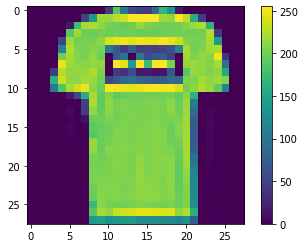

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

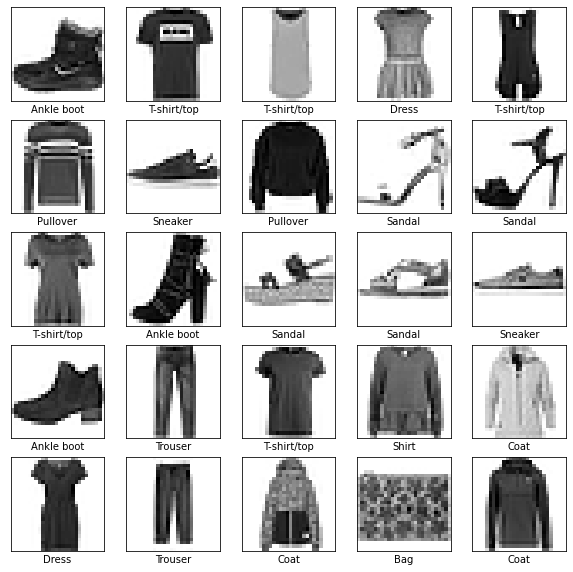

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary) # cmap=
  plt.xlabel(class_names[train_labels[i]])
plt.show()

4.构造网络

In [9]:
model = keras.Sequential([
                          # layers.Conv2D(input_shape=(28,28,1),filters=32, 
                          #               kernel_size=(3,3), 
                          #               strides=(1,1), 
                          #               padding='valid',activation='relu'),
                          # layers.MaxPool2D(pool_size=(2,2)),
                          layers.Flatten(input_shape=(28, 28)),
                          layers.Dense(512,activation='relu'),
                          layers.Dense(256,activation='relu'),
                          layers.Dense(128,activation='relu'),
                          layers.Dense(10,activation='softmax')
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [11]:
train_images.shape


(60000, 28, 28)

5.训练与验证

In [12]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6017 - accuracy: 0.7807
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3627 - accuracy: 0.8681
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3297 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.8872
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2818 - accuracy: 0.8957
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2738 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2578 - accuracy: 0.9027
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2485 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2344 - accuracy: 0.9112
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.228

In [13]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8835


[0.3364419639110565, 0.8834999799728394]

6.预测

In [14]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[1.8093826e-10 1.7245530e-07 5.1865641e-09 1.9334760e-10 6.0493804e-10
 4.8040540e-05 1.0387944e-08 3.5445332e-03 1.1900293e-09 9.9640721e-01]
9
9


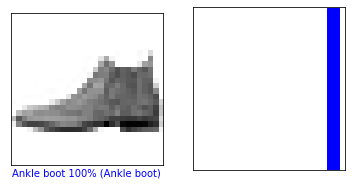

In [15]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

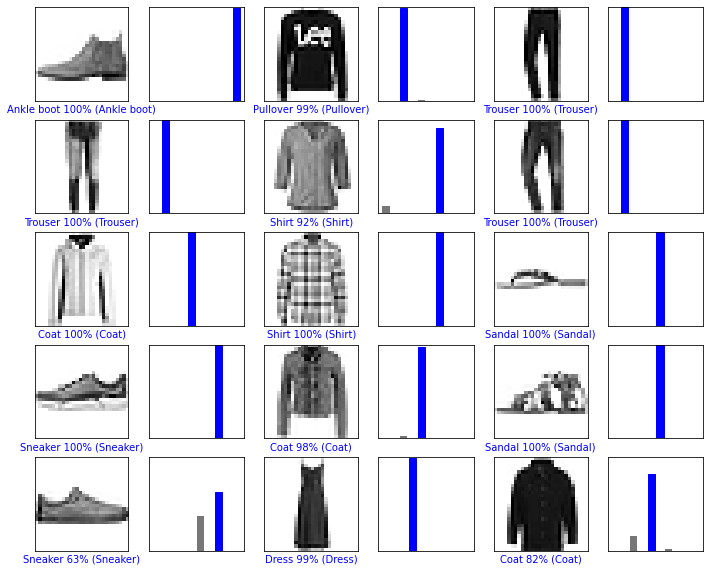

In [16]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

(1, 28, 28)
[[1.8093894e-10 1.7245530e-07 5.1865641e-09 1.9334760e-10 6.0493921e-10
  4.8040583e-05 1.0387944e-08 3.5445383e-03 1.1900316e-09 9.9640721e-01]]


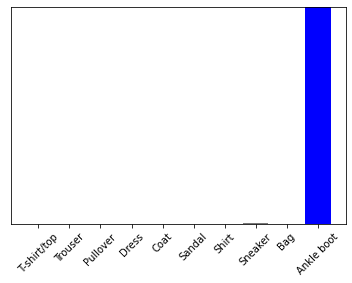

In [17]:
img = test_images[0]

img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = model.predict(img)

print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)